In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df= pd.read_csv("Data_for_UCI_named.csv")
df.sample(5)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
1117,0.765359,6.131991,8.556782,5.797011,3.347837,-0.965365,-1.166428,-1.216044,0.938925,0.822822,0.637312,0.492588,0.023237,unstable
4646,9.067146,9.472926,8.140089,6.143941,3.307202,-1.455176,-0.526021,-1.326005,0.265468,0.707036,0.081933,0.707150,0.042692,unstable
9299,3.653564,4.333105,4.656519,0.877623,4.871209,-1.842062,-1.746068,-1.283080,0.703868,0.180876,0.079064,0.306750,-0.027009,stable
6906,8.757373,8.137797,3.184345,8.983953,4.285288,-1.461420,-0.905590,-1.918278,0.171078,0.911105,0.298608,0.360649,0.035485,unstable
7557,9.442515,0.578507,1.545592,4.114449,4.801929,-1.755810,-1.718710,-1.327410,0.278588,0.785834,0.936022,0.450190,-0.047631,stable


In [3]:
df.shape

(10000, 14)

In [4]:
df['stabf']=df['stabf'].replace(['unstable','stable'],['0','1'])

In [5]:
df.sample(5)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
2960,8.886992,8.012393,2.834047,5.722050,3.852568,-1.174230,-0.948859,-1.729479,0.987438,0.207139,0.421279,0.668781,0.049201,0
9987,3.176332,5.101491,8.134258,4.985496,3.031084,-0.957564,-1.102893,-0.970628,0.527206,0.774756,0.180754,0.209837,0.010610,0
3659,5.806376,2.969342,2.873816,5.080283,4.455209,-1.407880,-1.707970,-1.339358,0.086858,0.237457,0.826670,0.104431,-0.039174,1
7430,8.480938,8.864988,5.278409,3.223676,3.792231,-1.508372,-0.616035,-1.667824,0.897338,0.341999,0.225583,0.171201,0.031979,0
194,6.116803,3.941364,2.316410,3.092281,3.885878,-1.731135,-1.500781,-0.653962,0.780690,0.755883,0.600049,0.955691,0.072207,0


In [6]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [7]:
df.dtypes

tau1     float64
tau2     float64
tau3     float64
tau4     float64
p1       float64
p2       float64
p3       float64
p4       float64
g1       float64
g2       float64
g3       float64
g4       float64
stab     float64
stabf     object
dtype: object

In [8]:
df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

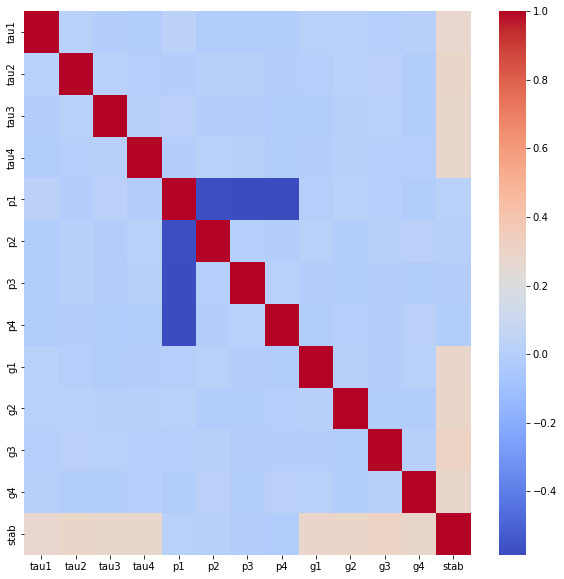

In [9]:
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap='coolwarm')
plt.show()

In [10]:
np.round(df.corr(),2)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
tau1,1.00,0.02,-0.01,-0.02,0.03,-0.02,-0.02,-0.02,0.01,0.02,-0.00,0.01,0.28
tau2,0.02,1.00,0.01,-0.00,-0.00,0.01,0.01,-0.01,-0.00,0.02,0.02,-0.01,0.29
tau3,-0.01,0.01,1.00,0.00,0.02,-0.00,-0.01,-0.02,-0.01,0.01,0.01,-0.01,0.28
tau4,-0.02,-0.00,0.00,1.00,-0.00,0.01,0.01,-0.01,-0.00,0.01,0.00,-0.00,0.28
p1,0.03,-0.00,0.02,-0.00,1.00,-0.57,-0.58,-0.58,0.00,0.02,0.00,-0.02,0.01
p2,-0.02,0.01,-0.00,0.01,-0.57,1.00,0.00,-0.01,0.02,-0.02,0.01,0.02,0.01
p3,-0.02,0.01,-0.01,0.01,-0.58,0.00,1.00,0.01,-0.00,-0.01,-0.01,-0.01,-0.00
p4,-0.02,-0.01,-0.02,-0.01,-0.58,-0.01,0.01,1.00,-0.01,0.00,-0.00,0.02,-0.02
g1,0.01,-0.00,-0.01,-0.00,0.00,0.02,-0.00,-0.01,1.00,0.01,-0.01,0.01,0.28
g2,0.02,0.02,0.01,0.01,0.02,-0.02,-0.01,0.00,0.01,1.00,-0.01,-0.01,0.29


In [11]:
from sklearn.linear_model import LogisticRegression 
X = df.drop(['stabf', 'stab'], axis=1)
Y=df['stabf']

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

model=LogisticRegression(random_state=0,multi_class='ovr',solver='lbfgs')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.818

In [13]:
from sklearn import svm 
svm_model = svm.SVC(kernel='rbf',C=30,gamma='auto')
svm_model.fit(X_train,y_train)
svm_model.score(X_test,y_test)

0.9515

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create an instance of the RandomForestClassifier class with desired hyperparameters
rfc = RandomForestClassifier(n_estimators=50, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', max_depth=None)

# Fit the classifier on the training data
rfc.fit(X_train, y_train)
new_data = [[0.82,5.42,9.43,2.48,3.04, -1.46, -0.935, -0.638,0.702, 0.1160, 0.57,0.578]]

# Make a prediction using the new data
prediction = rfc.predict(new_data)

# Print the predicted target value
print("Predicted target value:", prediction)

Predicted target value: ['1']


D:\ML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [15]:
import serial

ser = serial.Serial('COM4', 115200, timeout=1)
ser.flush()

while True:
    if ser.in_waiting > 0:
        data = ser.readline().decode().strip()
        powers = data.split(',')
        if len(powers) >= 3 and powers[0] != '' and powers[1] != '' and powers[2] != '':
            power1 = float(powers[0])
            power2 = float(powers[1])
            power3 = float(powers[2])
            print("Power 1: ", power1, "mW")
            print("Power 2: ", power2, "mW")
            print("Power 3: ", power3, "mW")
            rfc.fit(X_train, y_train)
            new_data = [[0.82,5.42,9.43,2.48,3.04, -power1/200, -power2/200, -power3/40,0.702, 0.1160, 0.57,0.578]]

            # Make a prediction using the new data
            prediction = rfc.predict(new_data)

            # Print the predicted target value
            print("Predicted target value:", prediction)


Power 1:  4.0 mW
Power 2:  0.0 mW
Power 3:  0.0 mW


D:\ML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Predicted target value: ['1']
Power 1:  4.0 mW
Power 2:  0.0 mW
Power 3:  0.0 mW


D:\ML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Predicted target value: ['1']
Power 1:  4.0 mW
Power 2:  0.0 mW
Power 3:  0.0 mW


D:\ML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Predicted target value: ['1']
Power 1:  4.0 mW
Power 2:  0.0 mW
Power 3:  0.0 mW


D:\ML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Predicted target value: ['1']
Power 1:  4.0 mW
Power 2:  0.0 mW
Power 3:  0.0 mW


KeyboardInterrupt: 